Lee la teoría incluida en el nuevo repositorio: uex-audiopy2.
2 Mostrar la gráfica en el dominio del tiempo para el audio mono y estéreo.
3 Explicar con tus palabras: frecuencia de muestreo, aliasing, profundidad de
bits, ancho de banda y tasa de bits.
4 → Audio mono. Aplicar la Transformada rápida de Fourier (FFT) para
cambiar al dominio de la frecuencia. Mostrar la gráfica y explicar el por qué.
5 Calcular la energía del espectrograma y la frecuencia de corte eligiendo un
epsilon (probad diferentes pero comentad solo uno).
6 Comprimir la onda aplicando downsampling, donde el factor se obtiene a
partir de la frecuencia de corte anteriormente calculada.
7 Mostrar el espectograma de ambas ondas: original y comprimida. Explicar las
diferencias.
8 Mostrar el tamaño de ambos archivos en Mb.
9 Colocar también dos widgets para reproducir los audios—original y
comprimido—y apreciar las diferencias en calidad.

ciertos eps y ver como cambia; grafica con corte, mas baja la señal, menos corte
mas alta me cargo la señal (0.5)
1 a la menos 5, por defecto para quitar los pequeños

Mostrar la gráfica en el dominio del tiempo para el audio mono y estéreo

Directorio con los audios de entrada: c:\Users\MSI\.git\new_repo\Audio\audio\examples
Directorio donde guardaremos los audios generados: c:\Users\MSI\.git\new_repo\Audio\audio\_output

Frecuencia de muestreo (sample rate): 44.1 kHz
Número de canales: 2
Número de muestras: 919907
Tamaño del archivo: 3.51 MB
Nuevos datos de audio (mono):
- Primeras muestras: [-12321.5 -12887.5 -13708.5 -14552.5 -14875.5]...
- Resolución: int16

Frecuencia de muestreo (sample rate): 44.1 kHz
Número de canales: 1
Número de muestras: (919907,)
Tamaño en memoria: 1.75 MB


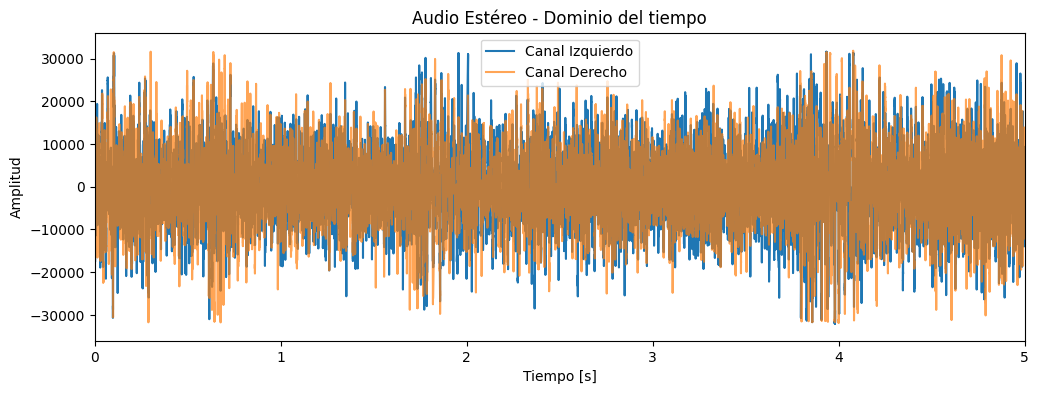

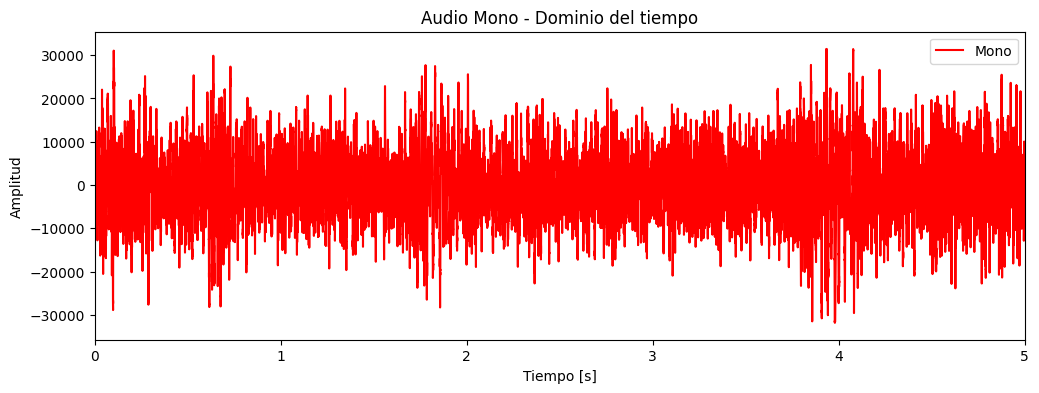

In [1]:
from scipy.io import wavfile
import IPython
import os
import numpy as np

# Creación de los directorios que usaremos.
cwd = os.getcwd()

audio_input_path = os.path.join(cwd, os.path.join('audio', 'examples'))
audio_output_path = os.path.join(cwd, os.path.join('audio', '_output'))
print(f'Directorio con los audios de entrada: {audio_input_path}')
print(f'Directorio donde guardaremos los audios generados: {audio_output_path}\n')

# Cargamos el archivo de audio -> game_of_thrones.wav
filename = os.path.join(audio_input_path, 'game_of_thrones.wav') 
#Sacamos del archivo la Frecuencia de muestreo (sample_rate) y los datos del audio
sample_rate, audio_data = wavfile.read(filename)

#Mostramos los datos del audio
#  Frecuencia de muestreo
print(f'Frecuencia de muestreo (sample rate): {sample_rate/1000} kHz')
#  Número total de canales
print(f'Número de canales: {audio_data.shape[1]}')
#  Número total de muestras
print(f'Número de muestras: {audio_data.shape[0]}')
#  Tamaño del archivo en MB
file_size_mb = os.path.getsize(filename) / (1024 * 1024)
print(f'Tamaño del archivo: {file_size_mb:.2f} MB')

# Convertimos a mono mediante la media por canal (simplificacion).
new_data_mono = audio_data.mean(axis=1)  

# Características del audio
print('Nuevos datos de audio (mono):')
print(f'- Primeras muestras: {new_data_mono[:5]}...')
# Mantener resolución int16
new_data_mono = new_data_mono.astype(np.int16)

print(f'- Resolución: {new_data_mono.dtype}\n')
#  Frecuencia de muestreo
print(f'Frecuencia de muestreo (sample rate): {sample_rate/1000} kHz')
# Número de canales
print(f'Número de canales: {1}')
# Número de muestras
print(f'Número de muestras: {new_data_mono.shape}')
# Tamaño en memoria (no archivo aún)
size_mb = new_data_mono.nbytes / (1024 * 1024)
print(f'Tamaño en memoria: {size_mb:.2f} MB')

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

t_stereo = np.arange(audio_data.shape[0]) / sample_rate
t_mono   = np.arange(new_data_mono.shape[0]) / sample_rate

# GRÁFICA DEL AUDIO ESTÉREO 
plt.figure(figsize=(12, 4))
plt.plot(t_stereo, audio_data[:, 0], label='Canal Izquierdo')
plt.plot(t_stereo, audio_data[:, 1], label='Canal Derecho', alpha=0.7)
plt.title('Audio Estéreo - Dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.xlim(0, 5)  # mostrar solo los primeros 5 segundos 
plt.show()

#  GRÁFICA DEL AUDIO MONO 
plt.figure(figsize=(12, 4))
plt.plot(t_mono, new_data_mono, color='r', label='Mono')
plt.title('Audio Mono - Dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.xlim(0, 5)  # mostrar solo los primeros 5 segundos
plt.show()



3 Explicar con tus palabras: frecuencia de muestreo, aliasing, profundidad de
bits, ancho de banda y tasa de bits.

Frecuencia de muestreo/ número de muestras por segundo que se toman de una onda sonora original para representarla digitalmente

Aliasing/Es un efecto de distorsión que ocurre cuando la frecuencia de muestreo es insuficiente y las frecuencias altas de la señal se “pliegan” y aparecen como frecuencias más bajas

Profundidad de bits/Número de bits usados para representar cada muestra

Ancho de banda/ Rango de frecuencias que define la precisión de nuestra señal digital con respecto a la grabación original

Tasa de bits/ Cantidad de bits transmitidos o almacenados por unidad de tiempo


4 Audio mono. Aplicar la Transformada rápida de Fourier (FFT) para
cambiar al dominio de la frecuencia. Mostrar la gráfica y explicar el por qué.

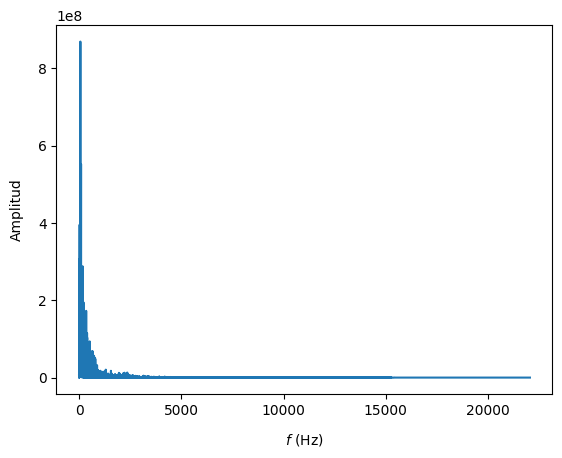

In [ ]:
# Número total de muestras
n = len(new_data_mono)
# Frecuencia de muestreo
Fs = sample_rate

# Calculando la Transformada Rapida de Fourier (FFT) en audio mono.
ch_Fourier = np.fft.fft(new_data_mono)  # ch1

# Tomo la mitad del espectro y calculo el módulo
abs_ch_Fourier = np.absolute(ch_Fourier[:n//2])

# Hacemos la gráfica
plt.plot(np.linspace(0, Fs/2, n//2), abs_ch_Fourier)
plt.ylabel('Amplitud', labelpad=10)
plt.xlabel('$f$ (Hz)', labelpad=10)
plt.show()

5 Calcular la energía del espectrograma y la frecuencia de corte eligiendo un
epsilon (probad diferentes pero comentad solo uno).

Epsilon: 0.063
Valor de corte para la energia del espectro: 494265918063.0955
Mascara: [False False False ...  True  True  True]
Frecuencia de corte f0 (Hz): 5391


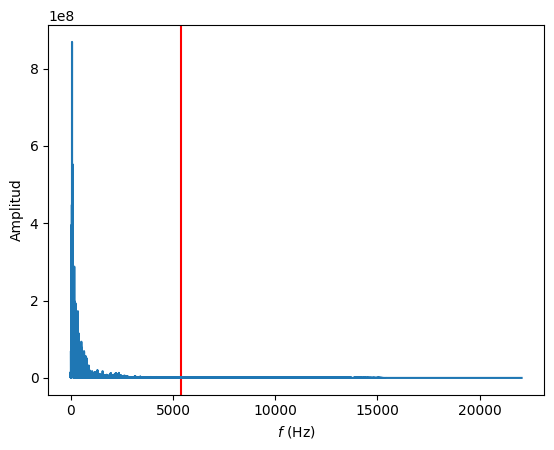

In [22]:
# Lista de valores epsilon (porcentaje de energía que se descarta)
epss = [1e-5, .02, .041, .063, .086, .101, .123]

# Probamos diferentes valores de epsilon   
eps = epss[3]
print(f'Epsilon: {eps}')

# Calculamos el umbral energético: fracción de energía que queremos conservar
thr_spec_energy = (1 - eps) * np.sum(abs_ch_Fourier)
print(f'Valor de corte para la energia del espectro: {thr_spec_energy}')

# Integral de la frecuencia 
spec_energy = np.cumsum(abs_ch_Fourier)

# Mascara (array booleano) que compara el
# valor de corte con la energia del espectro.
frequencies_to_remove = thr_spec_energy < spec_energy  
print(f'Mascara: {frequencies_to_remove}')

# Conversión del índice de corte a frecuencia en Hz
f0 = (len(frequencies_to_remove) - np.sum(frequencies_to_remove)) * (Fs/2) / (n//2)
print(f'Frecuencia de corte f0 (Hz): {int(f0)}')

# Representación gráfica del espectro con la frecuencia de corte
plt.axvline(f0, color='r')
plt.plot(np.linspace(0, Fs/2, n//2), abs_ch_Fourier)
plt.ylabel('Amplitud')
plt.xlabel('$f$ (Hz)')
plt.show()

EXPLICACIÓN DE 1 DE LOS RESULTADOS
Epsilon: 0.063
Frecuencia de corte : 5391 Hz

Eliminamos un 6.3% de la energía total y conservamos el 93.7% de la energía .
El 93.7% de la energía del audio está concentrada por debajo de 5391 Hz. Todo lo que está por encima de esa frecuencia aporta solo un 6.3% de la energía total.
En la gráfica se observa un gran pico en bajas frecuencias (zona cercana a 0 Hz) y que la energía cae rápidamente al aumentar la frecuencia.
Podemos concluir que las altas frecuencias tienen poca contribución energética.

6 Comprimir la onda aplicando downsampling, donde el factor se obtiene a
partir de la frecuencia de corte anteriormente calculada.

In [ ]:
# Calculamos el factor downsampling.
D = int(Fs / f0)
print(f'Factor de downsampling: {D}')

# Obtenemos los nuevos datos (slicing with stride).
new_data = new_data_mono[::D]

# Definimos el nombre del audio comprimido generado
wav_compressed_file = "sample_GOT_compressed.wav"

# Escribimos los datos a un archivo de tipo wav.
wavfile.write(
    filename=os.path.join(audio_output_path, wav_compressed_file),
    rate=int(Fs/D),
    data=new_data
)

# Cargamos el nuevo archivo.
new_sample_rate, new_audio_data = wavfile.read(filename=os.path.join(audio_output_path, wav_compressed_file))

Factor de downsampling: 8


7 Mostrar el espectograma de ambas ondas: original y comprimida. Explicar las
diferencias.

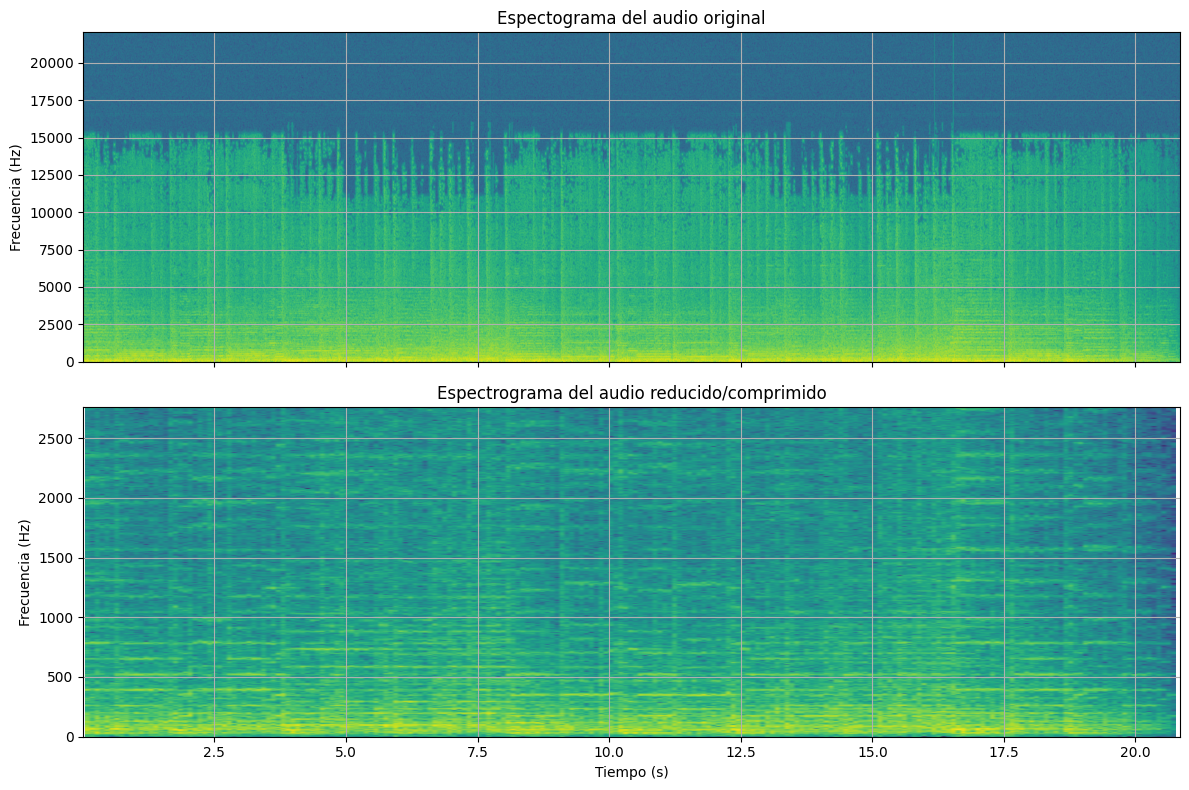

In [ ]:
#Creamos los espectogramas de la onda original y la comprimida

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

Pxx, freqs, bins, im = ax[0].specgram(new_data_mono, NFFT=1024, Fs=sample_rate, noverlap=512)
ax[0].set_title('Espectograma del audio original')
ax[0].set_ylabel('Frecuencia (Hz)')
ax[0].grid(True)

Pxx, freqs, bins, im = ax[1].specgram(new_audio_data, NFFT=1024, Fs=new_sample_rate, noverlap=512)
ax[1].set_title('Espectrograma del audio reducido/comprimido')
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_ylabel('Frecuencia (Hz)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

8 Mostrar el tamaño de ambos archivos en Mb.

In [ ]:
# Tamaño en memoria del audio original
size_mb = new_data_mono.nbytes / (1024 * 1024)
print(f'Tamaño en memoria Audio Original: {size_mb:.2f} MB')
# Tamaño en memoria del audio comprimido
size_mb = new_audio_data.nbytes / (1024 * 1024)
print(f'Tamaño en memoria Audio comprimido: {size_mb:.2f} MB')

Tamaño en memoria Audio Original: 1.75 MB
Tamaño en memoria Audio comprimido: 0.22 MB


9 Colocar también dos widgets para reproducir los audios—original y
comprimido—y apreciar las diferencias en calidad.

In [ ]:
#audio original
IPython.display.Audio(new_data_mono, rate=sample_rate)

In [ ]:
#audio comprimido
IPython.display.Audio(new_audio_data, rate=new_sample_rate)